In [1]:
from ase.io.trajectory import TrajectoryReader as tr

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from publish_format import useLargeSize

import re

In [2]:
color = {"DFT": "k",
         "AMPtorch DFT\n(with force)": "tab:orange",
         "AMPtorch DFT\n(without force)": "tab:blue",
         "AMPtorch DMC": "tab:red"}

In [3]:
def extract_forces(filename):
    forces = []
    trajs = tr(filename)
    for traj in trajs:
        forces.append(np.linalg.norm(np.array(traj.get_forces())))
    return np.array(forces)


def extract_geom(filename):
    '''
    "C Cl H H H"
    '''
    d_c_cl = []
    d_c_h1 = []
    d_c_h2 = []
    d_c_h3 = []
    theta_cl_c_h1 = []
    theta_cl_c_h2 = []
    theta_cl_c_h3 = []
    theta_h1_c_h2 = []
    theta_h1_c_h3 = []
    theta_h2_c_h3 = []
    
    trajs = tr(filename)
    for traj in trajs:
        d_c_cl.append(traj.get_distances(0, 1)[0])
        d_c_h1.append(traj.get_distances(0, 2)[0])
        d_c_h2.append(traj.get_distances(0, 3)[0])
        d_c_h3.append(traj.get_distances(0, 4)[0])

        theta_cl_c_h1.append(traj.get_angle(1,0,2))
        theta_cl_c_h2.append(traj.get_angle(1,0,3))
        theta_cl_c_h3.append(traj.get_angle(1,0,4))
        theta_h1_c_h2.append(traj.get_angle(2,0,3))
        theta_h1_c_h3.append(traj.get_angle(2,0,4))
        theta_h2_c_h3.append(traj.get_angle(3,0,4))
        
    data = pd.DataFrame(
        {r"$d_{C-Cl}$": d_c_cl, 
         r"$d_{C-H_{1}}$": d_c_h1, 
         r"$d_{C-H_{2}}$": d_c_h2, 
         r"$d_{C-H_{3}}$": d_c_h3,
         r"$\theta_{Cl-C-H_{1}}$": theta_cl_c_h1,
         r"$\theta_{Cl-C-H_{2}}$": theta_cl_c_h2,
         r"$\theta_{Cl-C-H_{3}}$": theta_cl_c_h3,
         r"$\theta_{H_{1}-C-H_{2}}$": theta_h1_c_h2,
         r"$\theta_{H_{1}-C-H_{3}}$": theta_h1_c_h3,
         r"$\theta_{H_{2}-C-H_{3}}$": theta_h2_c_h3,
         }
    )
    return data

## NVE results analysis

Define the corresponding NVE trajectories

In [4]:
file = {}

file["DFT"] = "../md_start_eq/nve/dft/md_nve_dft.traj"
file["AMPtorch DFT\n(with force)"] = "../md_start_eq/nve/amptorch_dft_force_pyscf_ase/md_nve_amptorch.traj"
file["AMPtorch DFT\n(without force)"] = "../md_start_eq/nve/amptorch_dft_noforce_pyscf_ase/md_nve_amptorch.traj"
file["AMPtorch DMC"] = "../md_start_eq/nve/amptorch_dmc/md_nve_amptorch.traj"

In [5]:
# show the running time for each trajectories
for item in file:
    print(item, " has length ", len(tr(file[item])))

DFT  has length  2001
AMPtorch DFT
(with force)  has length  2001
AMPtorch DFT
(without force)  has length  2001
AMPtorch DMC  has length  2001


Check starting structures

In [6]:
for item in file:
    print(item)
    print(tr(file[item])[0].get_positions())

DFT
[[6.78062355 7.29304086 7.6       ]
 [8.57730202 7.29304506 7.6       ]
 [6.43559798 8.33077319 7.6       ]
 [6.43561012 6.77417477 6.70129225]
 [6.43561012 6.77417477 8.49870775]]
AMPtorch DFT
(with force)
[[6.78062355 7.29304086 7.6       ]
 [8.57730202 7.29304506 7.6       ]
 [6.43559798 8.33077319 7.6       ]
 [6.43561012 6.77417477 6.70129225]
 [6.43561012 6.77417477 8.49870775]]
AMPtorch DFT
(without force)
[[6.78062355 7.29304086 7.6       ]
 [8.57730202 7.29304506 7.6       ]
 [6.43559798 8.33077319 7.6       ]
 [6.43561012 6.77417477 6.70129225]
 [6.43561012 6.77417477 8.49870775]]
AMPtorch DMC
[[6.78062355 7.29304086 7.6       ]
 [8.57730202 7.29304506 7.6       ]
 [6.43559798 8.33077319 7.6       ]
 [6.43561012 6.77417477 6.70129225]
 [6.43561012 6.77417477 8.49870775]]


### Extract mean values for the observables

In [7]:
for item in file:
    geom = extract_geom(file[item])
    print(item)
    print(geom.mean())

DFT
$d_{C-Cl}$                    1.811199
$d_{C-H_{1}}$                 1.098601
$d_{C-H_{2}}$                 1.095704
$d_{C-H_{3}}$                 1.096249
$\theta_{Cl-C-H_{1}}$       108.442809
$\theta_{Cl-C-H_{2}}$       108.151554
$\theta_{Cl-C-H_{3}}$       108.244564
$\theta_{H_{1}-C-H_{2}}$    110.453255
$\theta_{H_{1}-C-H_{3}}$    110.463965
$\theta_{H_{2}-C-H_{3}}$    110.537500
dtype: float64
AMPtorch DFT
(with force)
$d_{C-Cl}$                    1.810108
$d_{C-H_{1}}$                 1.099254
$d_{C-H_{2}}$                 1.095532
$d_{C-H_{3}}$                 1.097044
$\theta_{Cl-C-H_{1}}$       108.431418
$\theta_{Cl-C-H_{2}}$       108.240329
$\theta_{Cl-C-H_{3}}$       108.327428
$\theta_{H_{1}-C-H_{2}}$    110.398552
$\theta_{H_{1}-C-H_{3}}$    110.398722
$\theta_{H_{2}-C-H_{3}}$    110.506160
dtype: float64
AMPtorch DFT
(without force)
$d_{C-Cl}$                    1.943201
$d_{C-H_{1}}$                 1.109394
$d_{C-H_{2}}$                 1.100266
$d_{C-H_{3}}$ 

### Plot the Energy trajectory

In [7]:
def extract_total_energy(filename):
    energy = []
    trajs = tr(filename)
    for traj in trajs:
        energy.append(traj.get_total_energy())
    return np.array(energy)

tot_e = {}
for item in file:
    tot_e[item] = extract_total_energy(file[item])
    tot_e[item] -= np.min(tot_e[item])
    # tot_e[item] /= 5

In [8]:
def extract_potential_energy(filename):
    energy = []
    trajs = tr(filename)
    for traj in trajs:
        energy.append(traj.get_potential_energy())
    return np.array(energy)

pot_e = {}
for item in file:
    pot_e[item] = extract_potential_energy(file[item])
    pot_e[item] -= min(pot_e[item])

In [9]:
def extract_kinetic_energy(filename):
    energy = []
    trajs = tr(filename)
    for traj in trajs:
        energy.append(traj.get_kinetic_energy())
    return np.array(energy)

kin_e = {}
for item in file:
    kin_e[item] = extract_kinetic_energy(file[item])

Plot the $E_{tot}$ v.s. Time

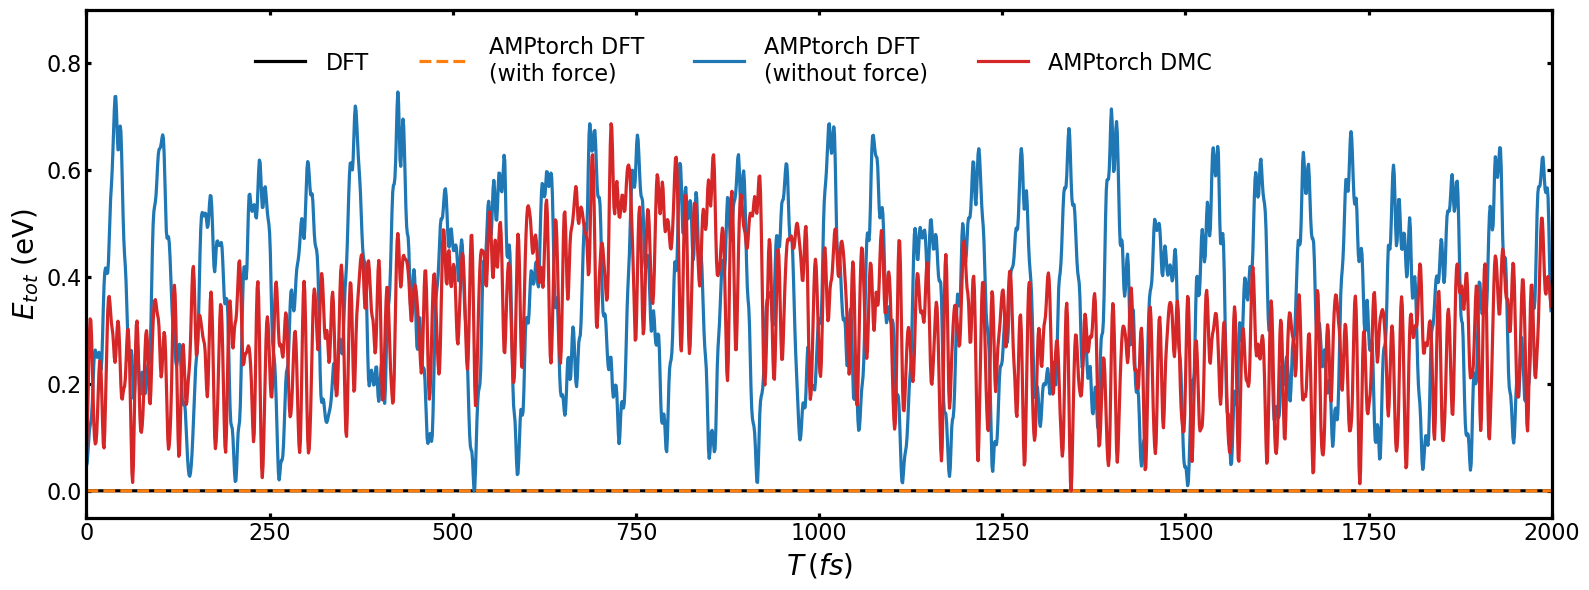

In [14]:
plot_data = tot_e

start, end = 0, min(1000, len(plot_data["DFT"]))
start, end = 0, 2000
time = np.arange(end)
figname = "ch3cl_nve_etot_{}.png".format(end)
xlabel = r"$T\,(fs)$"
ylabel = r"$E_{tot}$ (eV)"
# ylabel = r"Relative Energy (eV/atom)"

plt.style.use('default')
fig, ax = plt.subplots(figsize=(16,6))

for item in plot_data:
    if item == "AMPtorch DFT\n(with force)":
        ax.plot(time, 
                plot_data[item][start:end],
                c=color[item],
                linestyle="dashed",
                label=item)
    else:
        ax.plot(time, 
                plot_data[item][start:end],
                c=color[item],
                label=item)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(loc='center left', bbox_to_anchor=(0.1, 0.9), frameon=False, fontsize=18, ncol=4)
ax.set_xlim(start, end)
ax.set_ylim(-0.05, 0.9)
useLargeSize(plt, ax)
plt.savefig("./nve_analysis/{}".format(figname), dpi=300)

plot $E_{tot}$ distribution

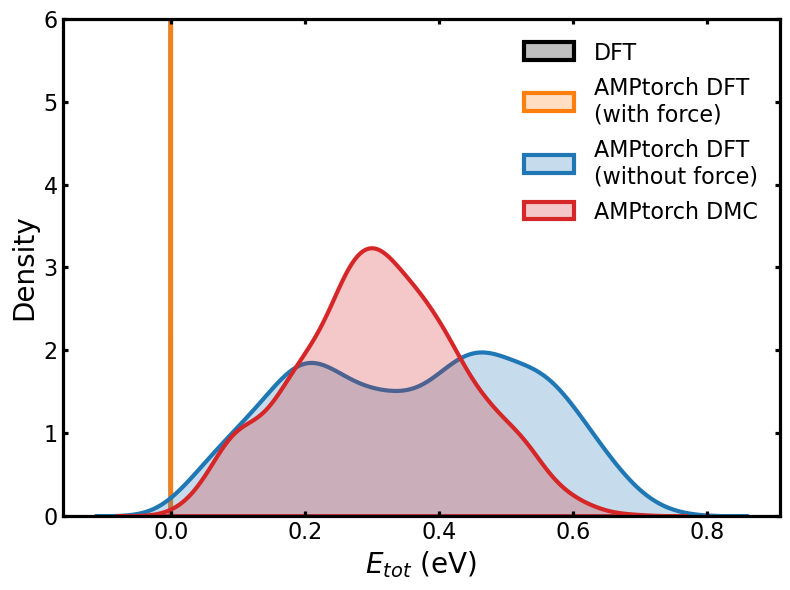

In [16]:
plot_data = tot_e
figname = "ch3cl_nve_etot_distribution.png"
ylabel = r"Density"
xlabel = r"$E_{tot}$ (eV)"

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8,6))

for item in plot_data:
    sns.kdeplot(plot_data[item], 
                shade = True, 
                linewidth = 3, 
                bw_adjust = 1, 
                label = item, 
                color = color[item],
            )

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(frameon=False, fontsize=18)
ax.set_ylim(0, 6)
useLargeSize(plt, ax)
plt.savefig("./nve_analysis/{}".format(figname), dpi=300)

plot $E_{pot}$ v.s. time

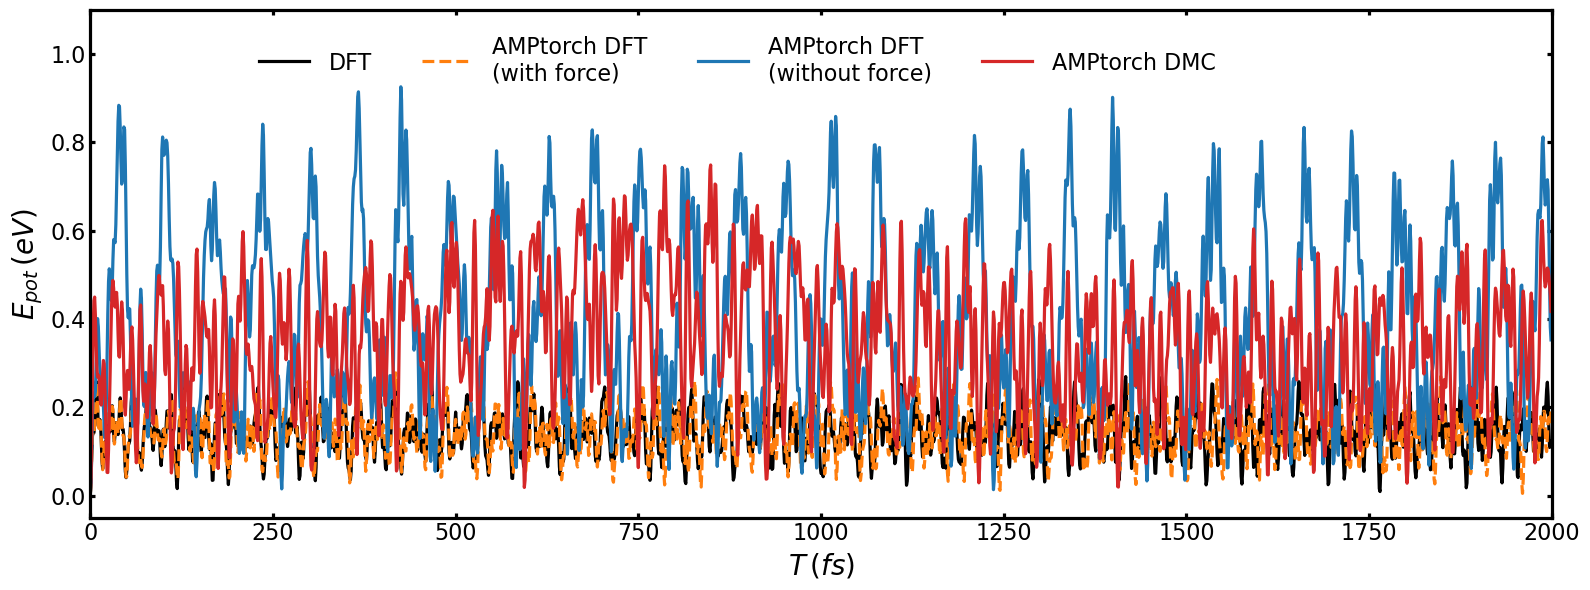

In [22]:
plot_data = pot_e

# start, end = 0, min(1000, len(plot_data["DFT"]))
start, end = 0, 2000
time = np.arange(end)
figname = "ch3cl_nve_epot_{}.png".format(end)
xlabel = r"$T\,(fs)$"
ylabel = r"$E_{pot}\,(eV$)"

plt.style.use('default')
fig, ax = plt.subplots(figsize=(16,6))

for item in plot_data:
    if item == "AMPtorch DFT\n(with force)":
        ax.plot(time, 
                plot_data[item][start:end],
                c=color[item],
                linestyle="dashed",
                label=item)
    else:
        ax.plot(time, 
                plot_data[item][start:end],
                c=color[item],
                label=item)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(loc='center left', bbox_to_anchor=(0.1, 0.9), frameon=False, fontsize=18, ncol=4)
ax.set_xlim(start, end)
ax.set_ylim(-0.05, 1.1)
useLargeSize(plt, ax)
plt.savefig("./nve_analysis/{}".format(figname), dpi=300)

plot $E_{pot}$ distribution

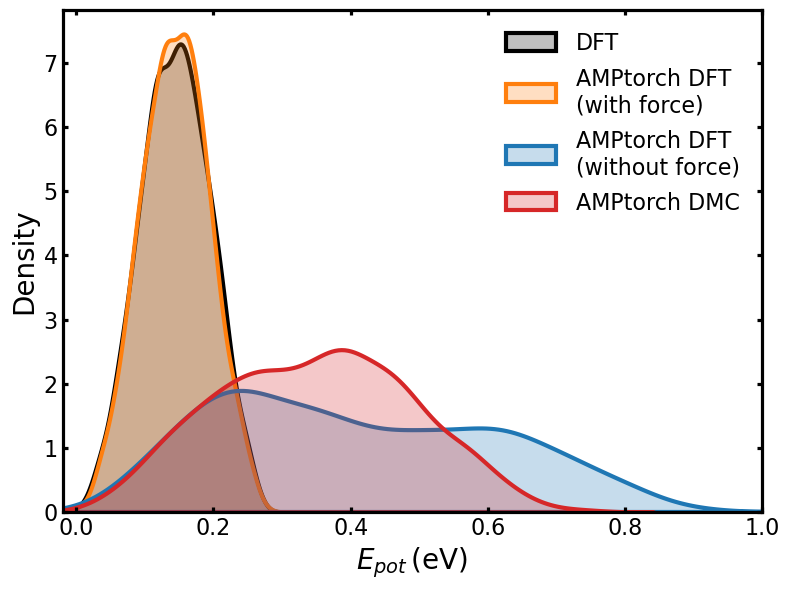

In [29]:
plot_data = pot_e
figname = "ch3cl_nve_epot_distribution.png"
ylabel = r"Density"
xlabel = r"$E_{pot}\,$(eV)"

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8,6))

for item in plot_data:
    sns.kdeplot(plot_data[item], 
                shade = True, 
                linewidth = 3, 
                bw_adjust = 1, 
                label = item, 
                color = color[item],
            )

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(frameon=False, fontsize=18)
ax.set_xlim(-0.02, 1.0)
# ax.set_ylim(-0.1, 8)
useLargeSize(plt, ax)
plt.savefig("./nve_analysis/{}".format(figname), dpi=300)

plot $E_{kin}$ v.s. Time

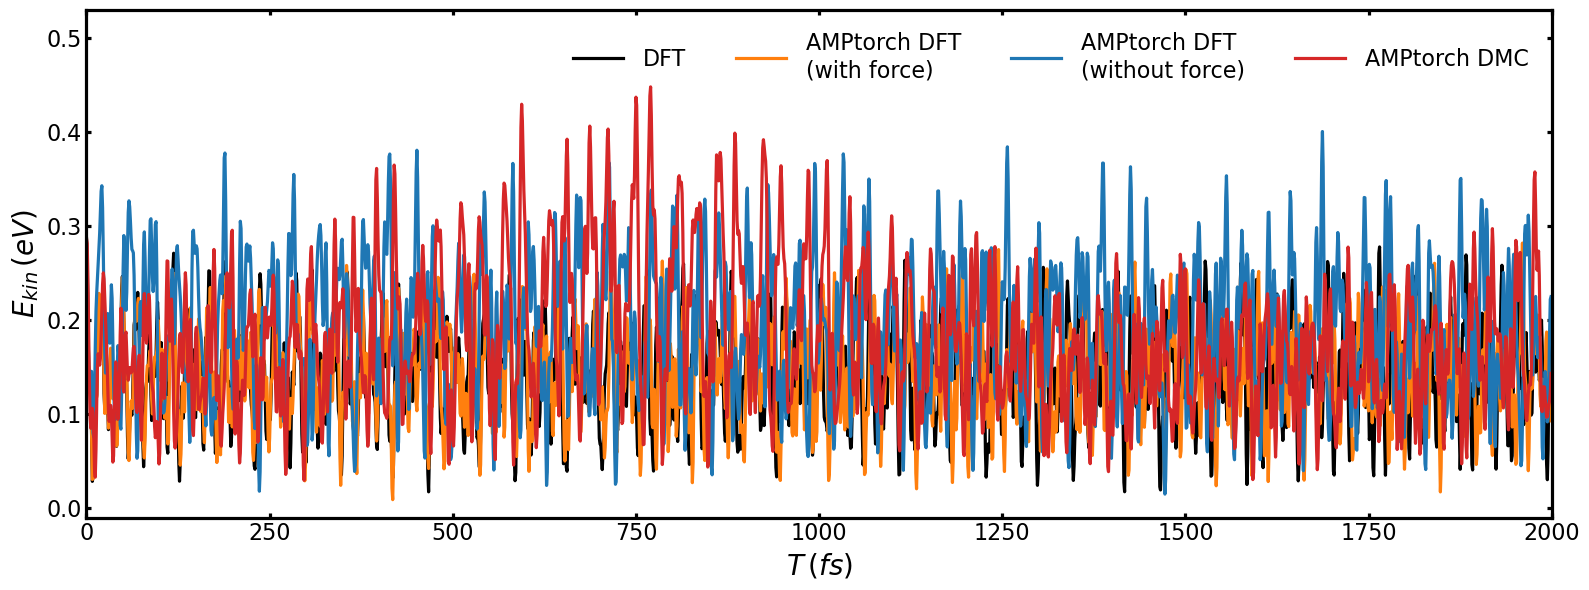

In [36]:
plot_data = kin_e

start, end = 0, min(1000, len(plot_data["DFT"]))
start, end = 0, 2000
time = np.arange(end)
figname = "ch3cl_nve_ekin_{}.png".format(end)
xlabel = r"$T\,(fs)$"
ylabel = r"$E_{kin}\,(eV$)"

plt.style.use('default')
fig, ax = plt.subplots(figsize=(16,6))

for item in plot_data:
    ax.plot(time, 
            plot_data[item][start:end],
            c=color[item],
            label=item)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(frameon=False, fontsize=18, ncol=4)
ax.set_xlim(start, end)
ax.set_ylim(-0.01, 0.53)
useLargeSize(plt, ax)
plt.savefig("./nve_analysis/{}".format(figname), dpi=300)

plot $E_{kin}$ distribution

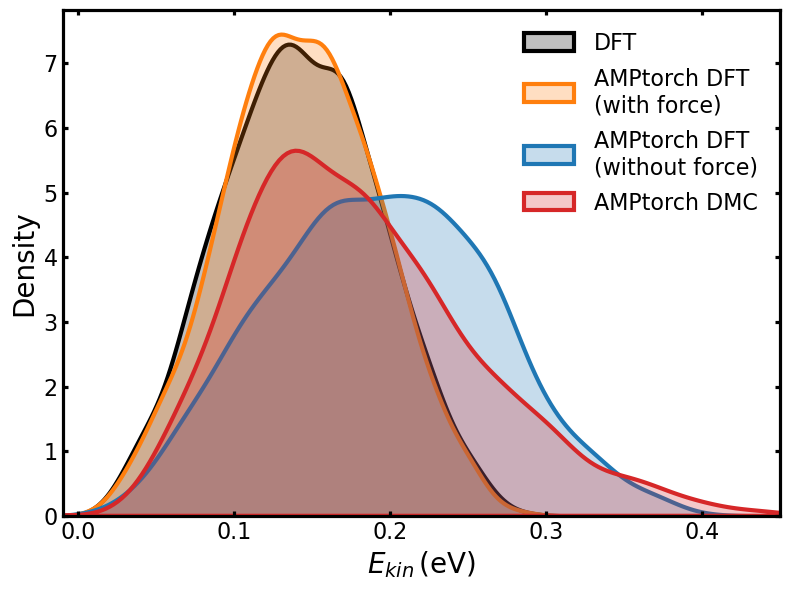

In [40]:
plot_data = kin_e
figname = "ch3cl_nve_ekin_distribution.png"
ylabel = r"Density"
xlabel = r"$E_{kin}\,$(eV)"

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8,6))

for item in plot_data:
    sns.kdeplot(plot_data[item], 
                shade = True, 
                linewidth = 3, 
                bw_adjust = 1, 
                label = item, 
                color = color[item],
            )

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(frameon=False, fontsize=18)
ax.set_xlim(-0.01, 0.45)
useLargeSize(plt, ax)
plt.savefig("./nve_analysis/{}".format(figname), dpi=300)

### Plot geometry v.s. time

In [17]:
data = {}

for item in file:
    data[item] = extract_geom(file[item])

observables = data[item].columns

plot observables v.s. time

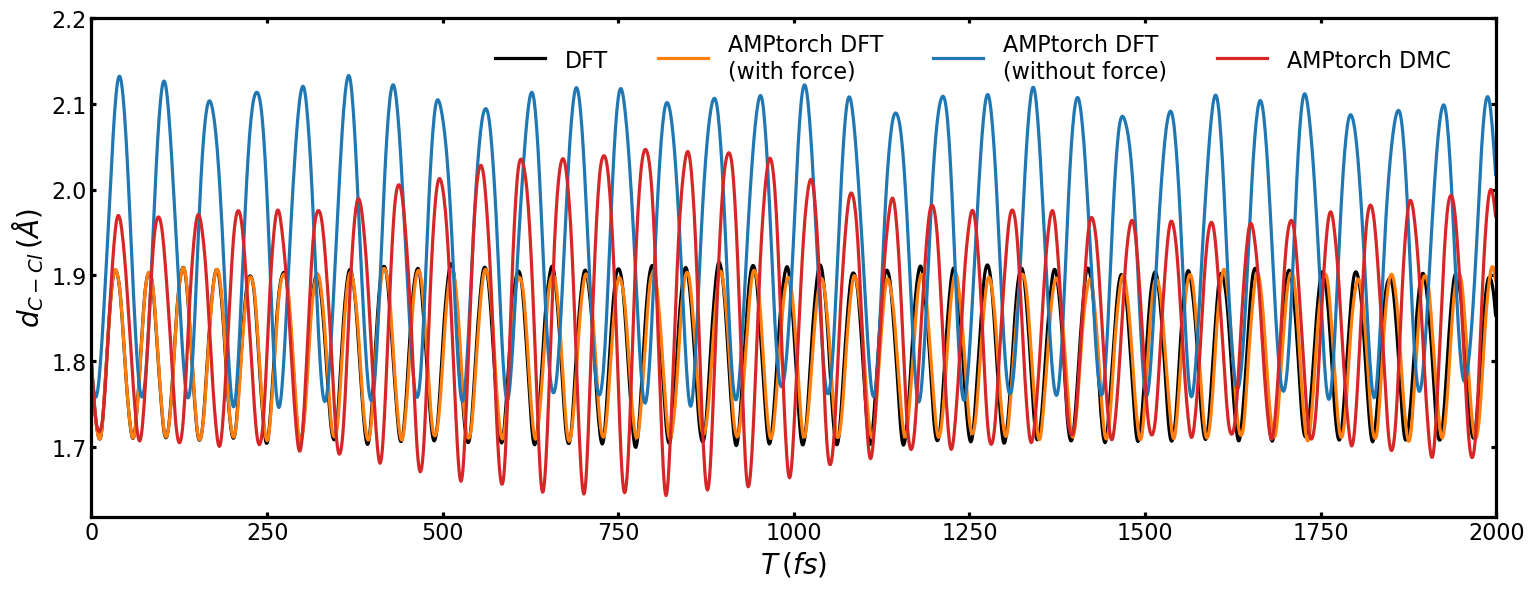

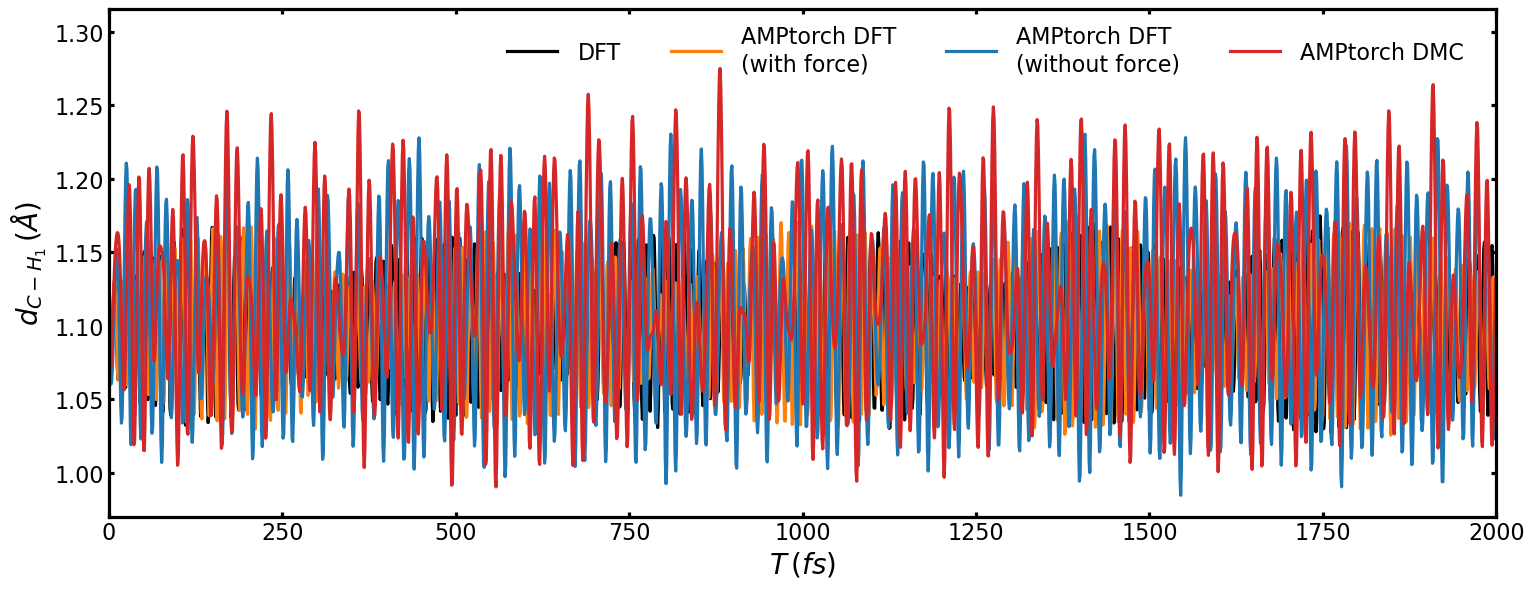

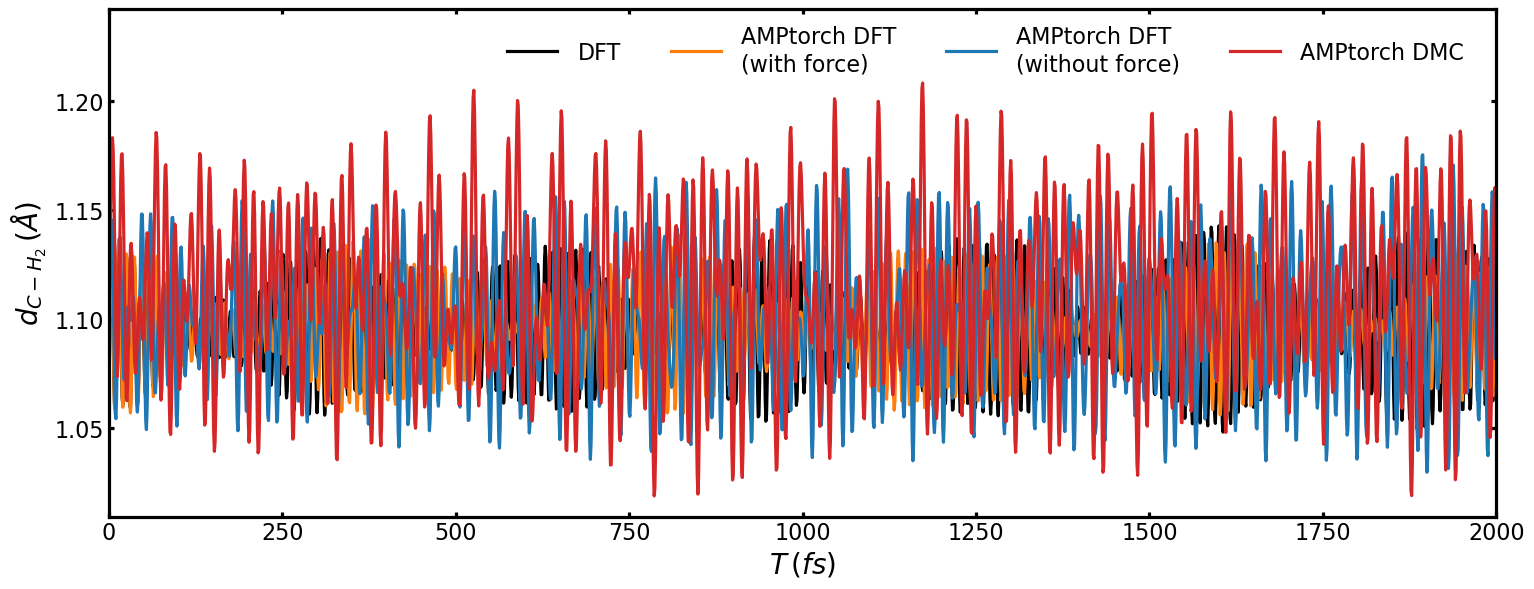

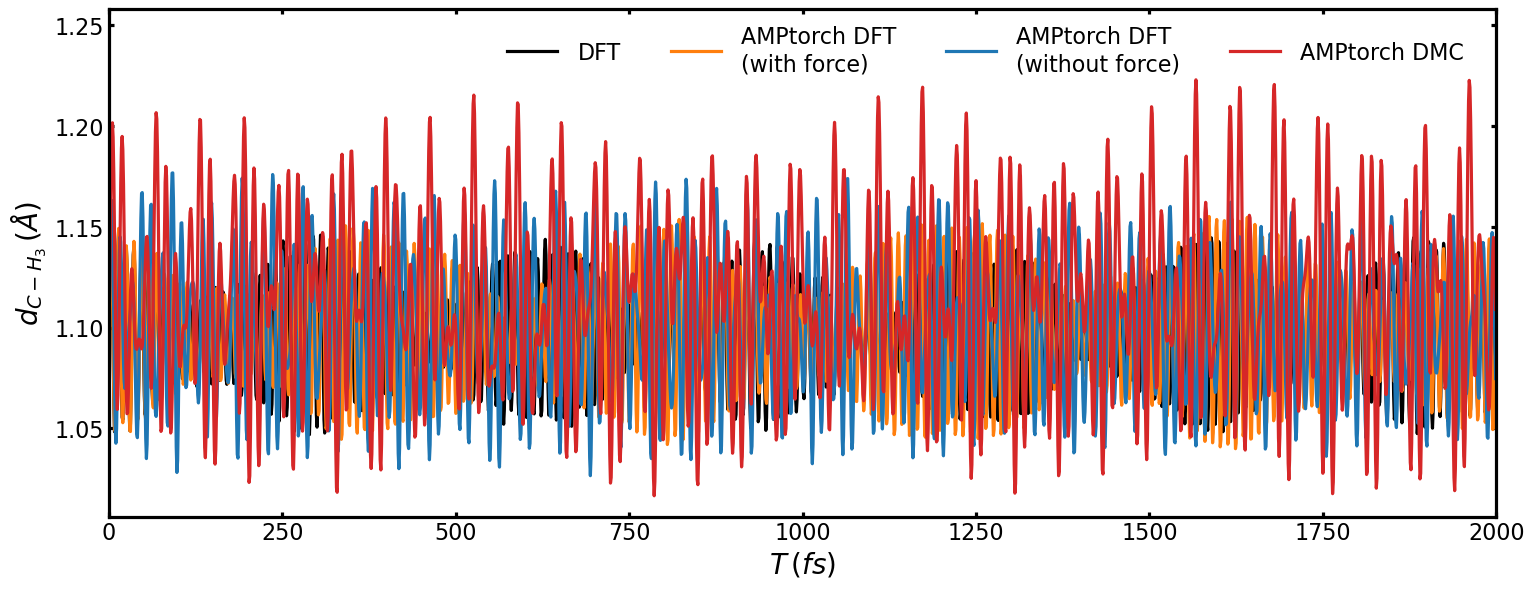

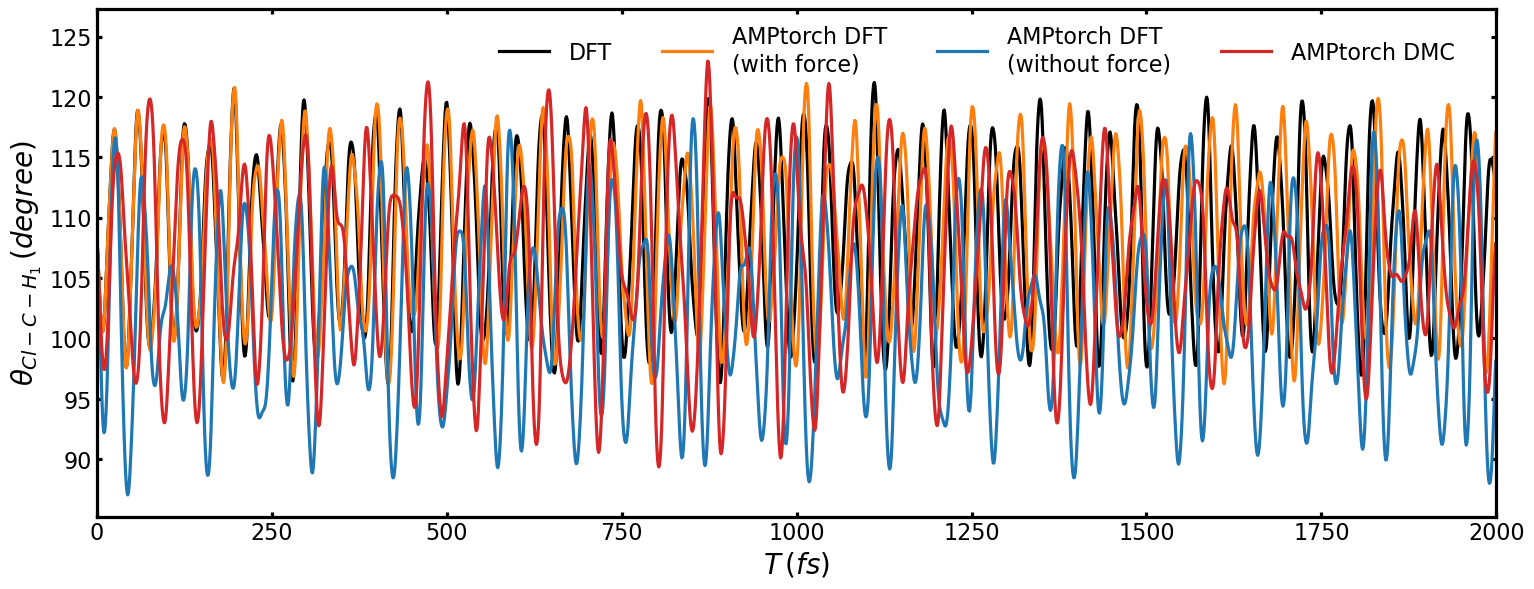

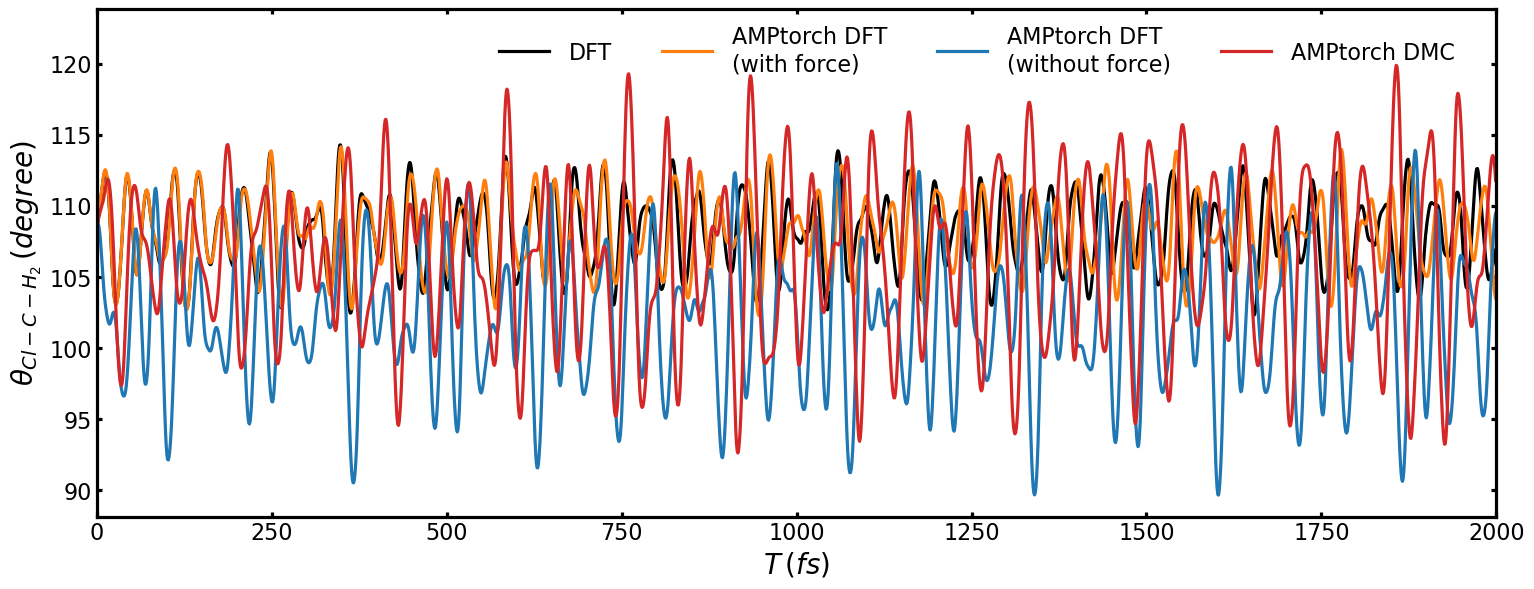

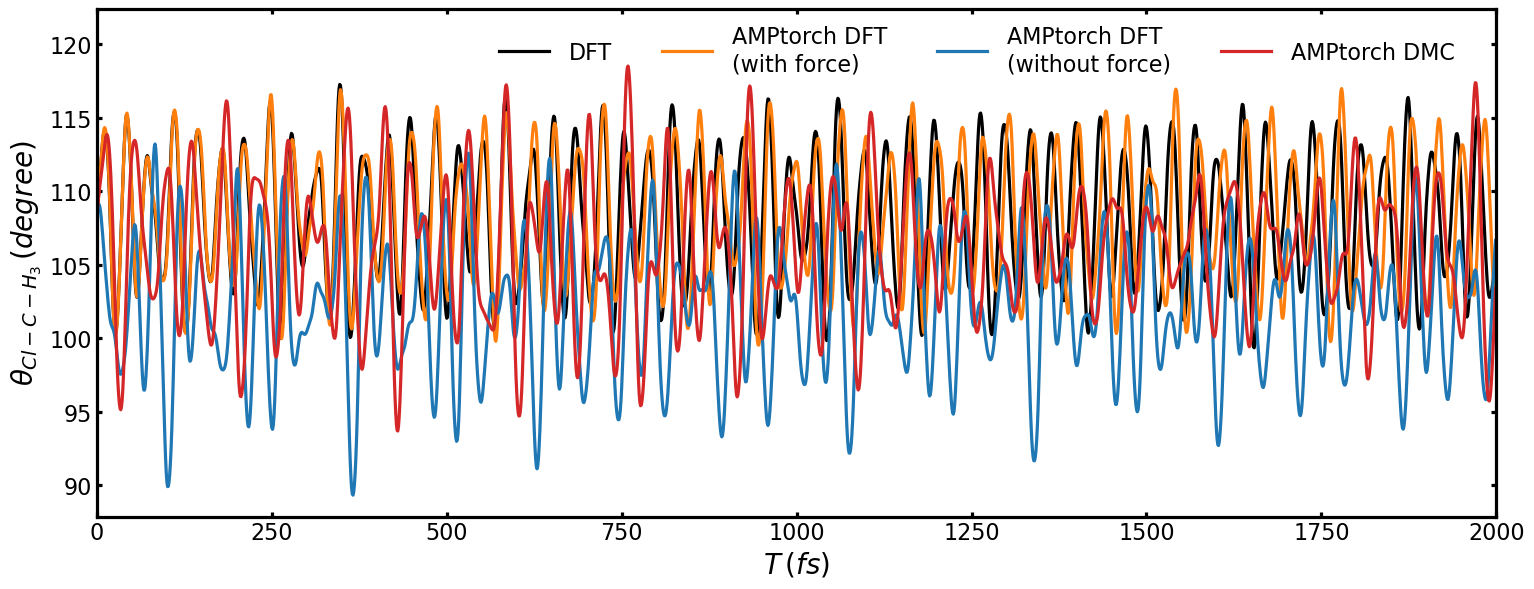

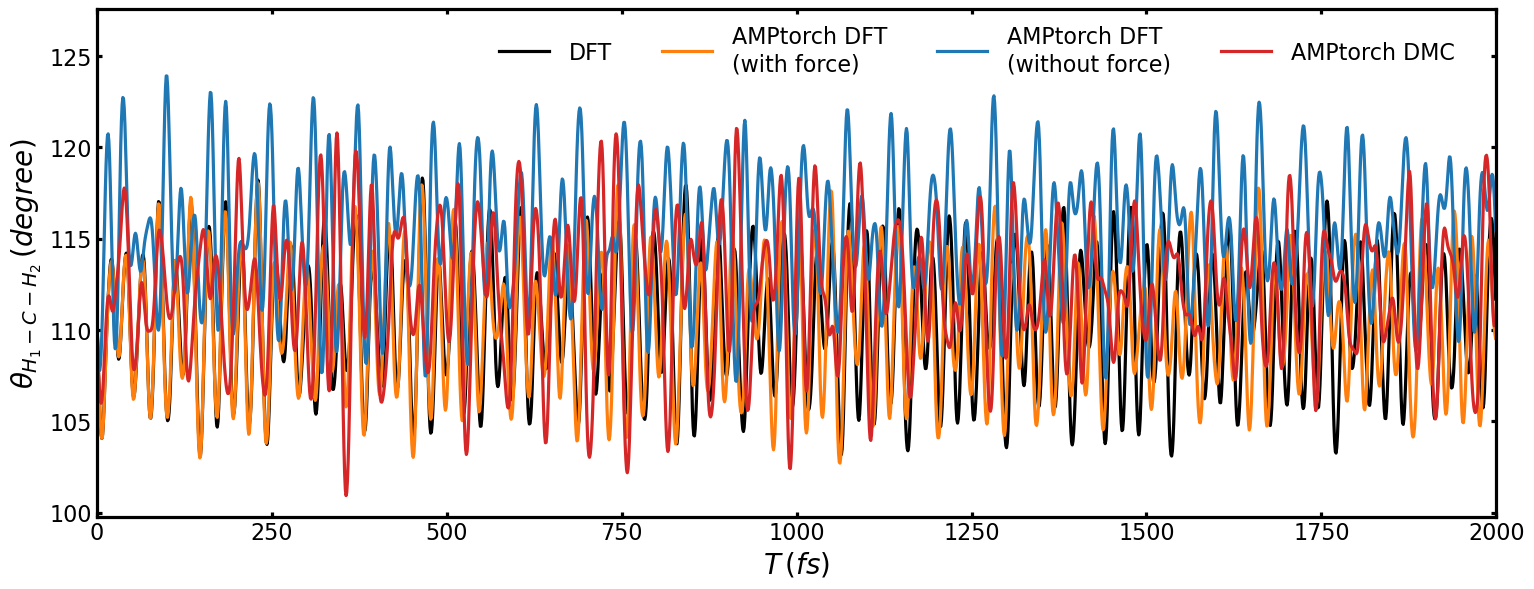

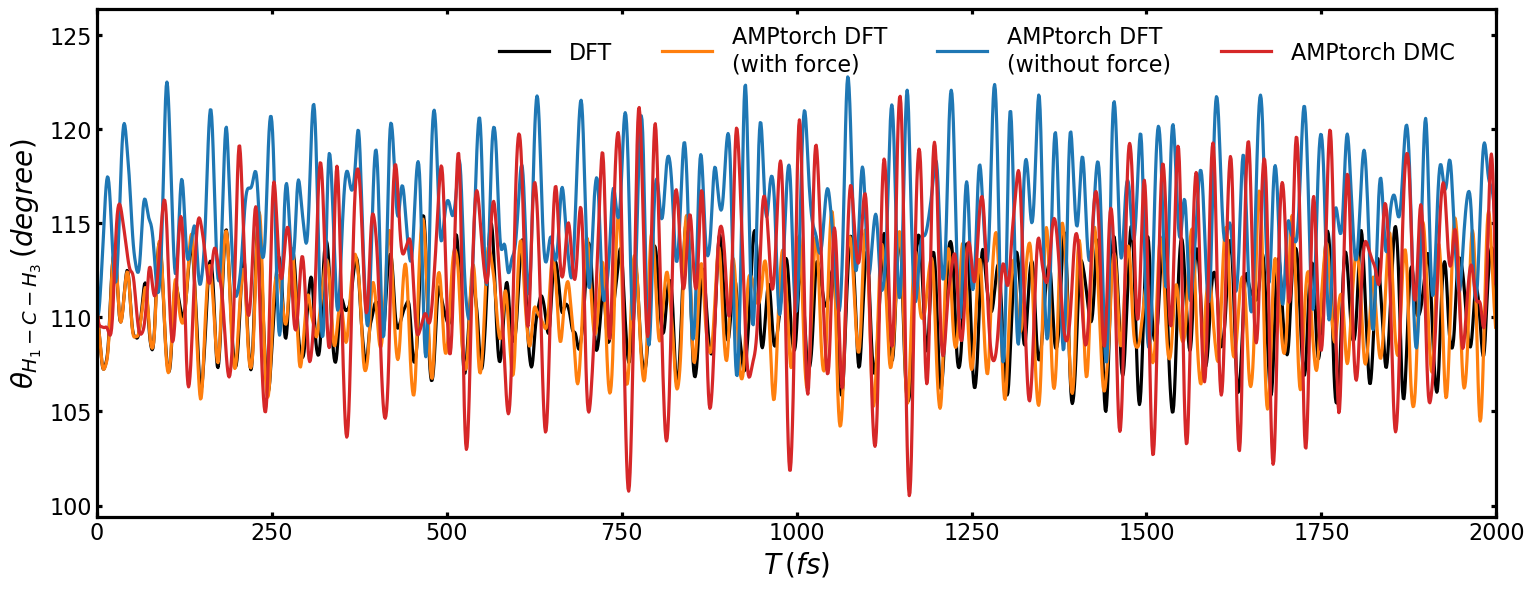

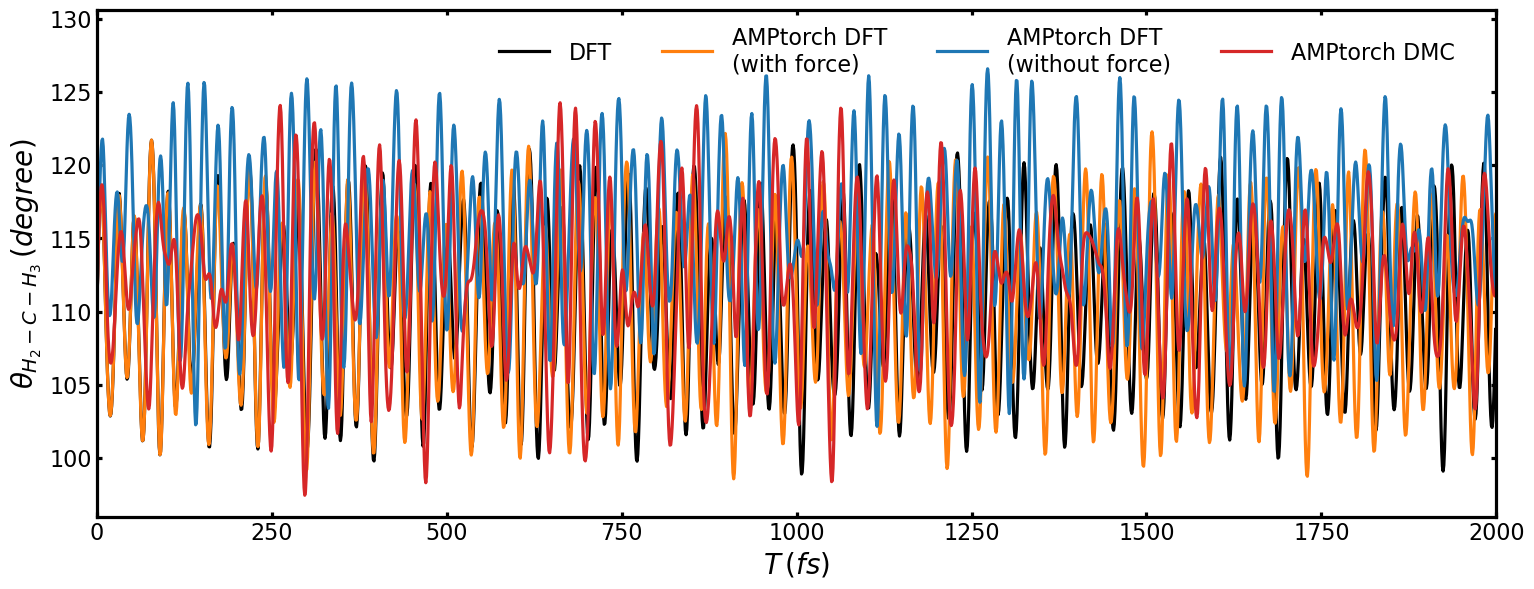

In [18]:
for observable in observables:
    plot_data = {}
    for item in file:
        plot_data[item] = data[item][observable]

    xlabel = r"$T\,(fs)$"
    if "d" in observable:
        ylabel = observable + r"$\,({\AA})$"
    if "theta" in observable:
        ylabel = observable + r"$\,(degree)$"


    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(16,6))

    min_len = float("inf")
    for item in plot_data:
        min_len = min(min_len, len(plot_data[item]))
    # start, end = 0, min(1000, min_len)
    start, end = 0, 2000
    time = np.arange(end)

    for item in plot_data:
        ax.plot(time, 
                plot_data[item][start:end], 
                c=color[item], 
                label=item,
                )

    ax.set_xlabel(xlabel=xlabel)
    ax.set_ylabel(ylabel=ylabel)
    ax.tick_params(axis="y")
    ax.yaxis.set_ticks_position("both")
    ax.xaxis.set_ticks_position("both")
    ax.legend(loc=(0.28, 0.85), frameon=False, fontsize=18, ncol=4)
    ax.set_xlim(start, end)
    bottom, up = ax.get_ylim()
    ax.set_ylim(bottom, 1.02 * up)
    # ax.set_ylim(1.68, 2.21)
    useLargeSize(plt, ax)
    new_observable = ""
    for i in observable:
        if i not in {"\\","$", "{", "}", "-"}:
            new_observable += i 
    figname = "ch3cl_nve_{}.png".format(new_observable)
    # print(figname)
    plt.savefig("./nve_analysis/{}".format(figname), dpi=300)
    

plot observables distribution

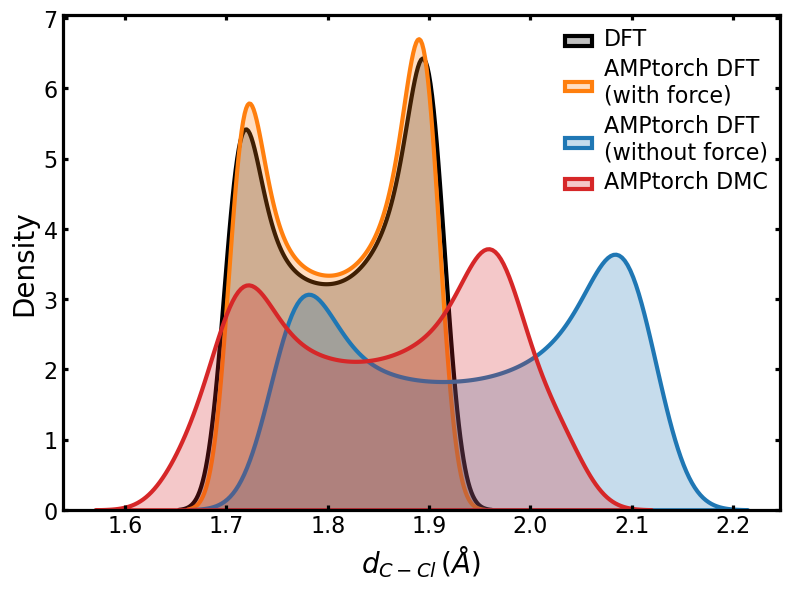

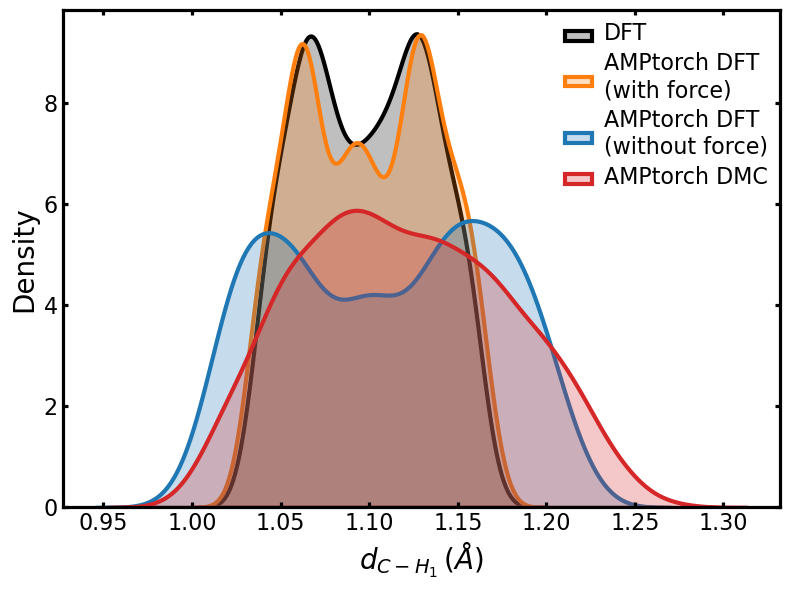

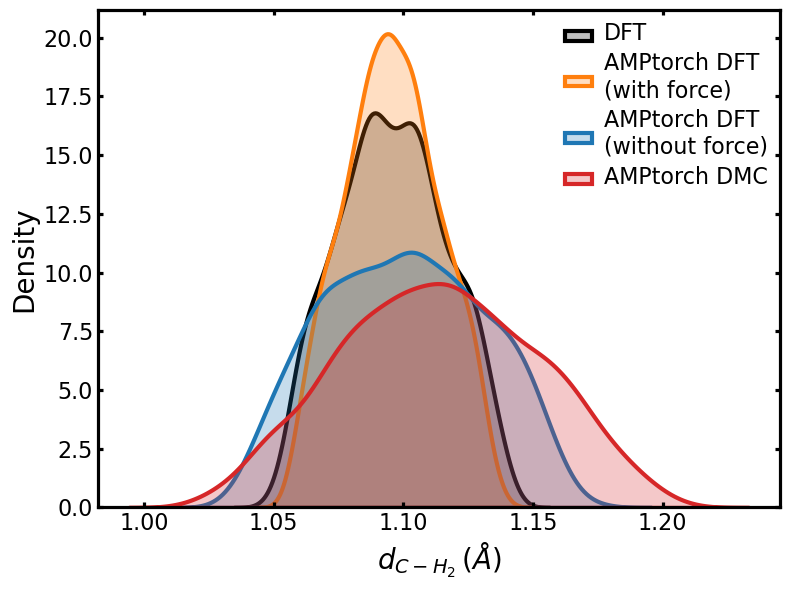

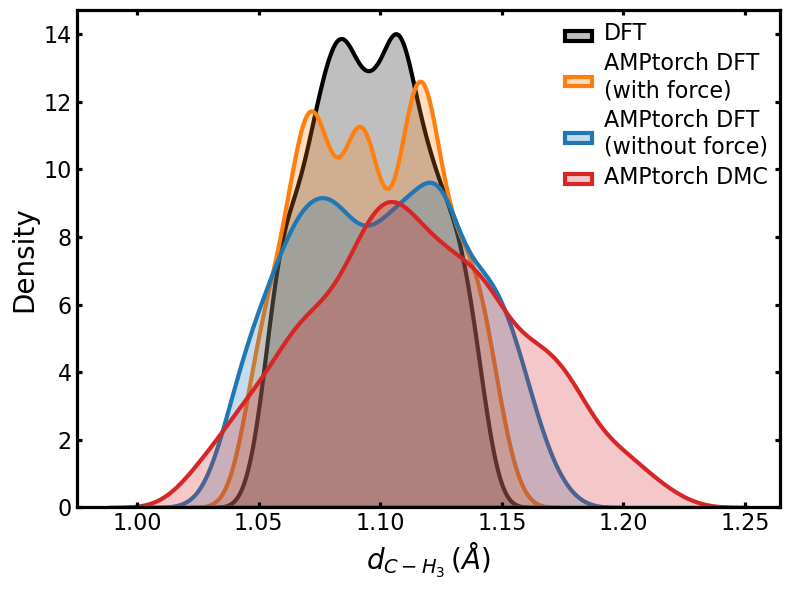

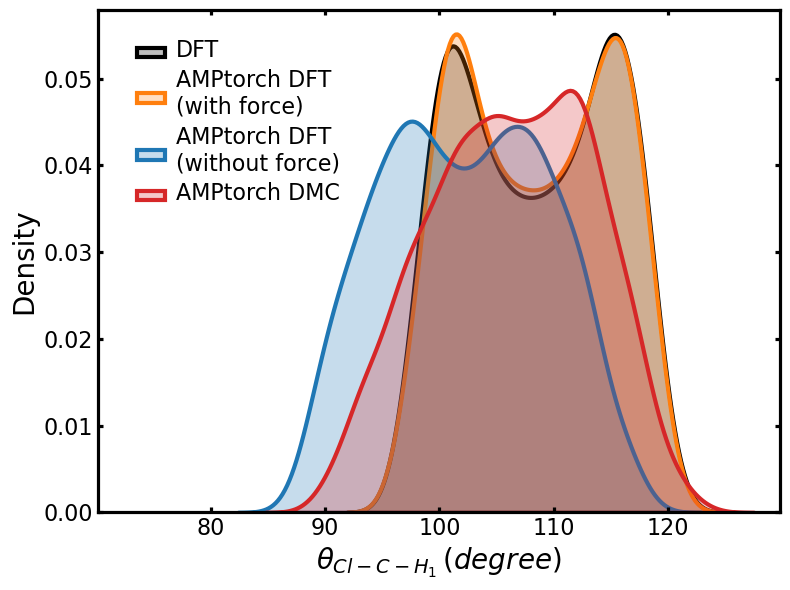

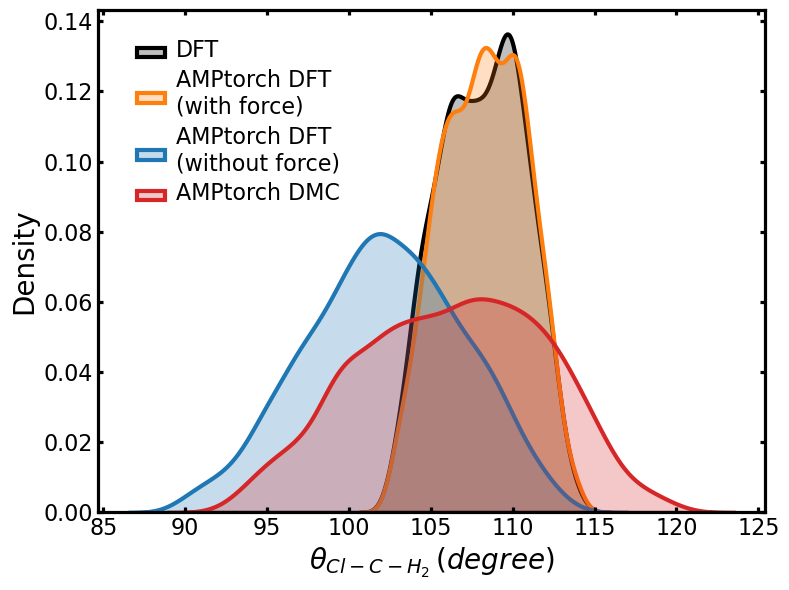

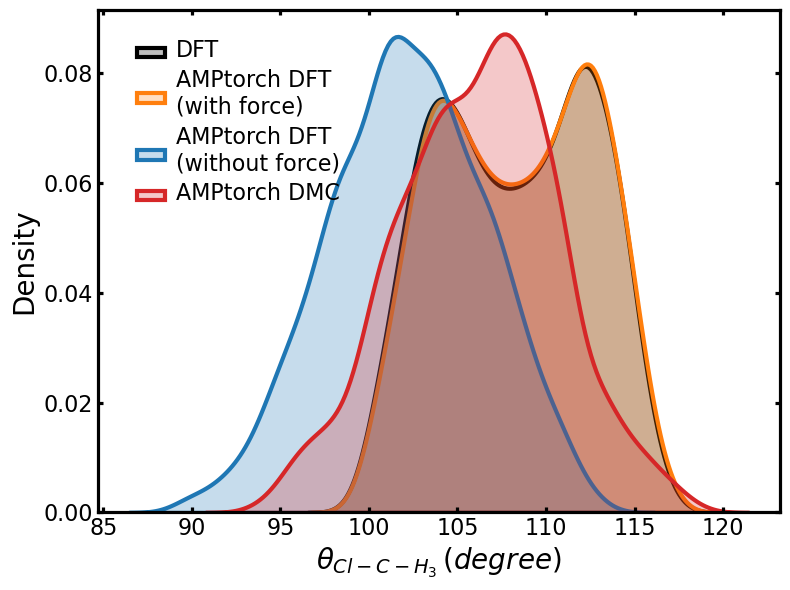

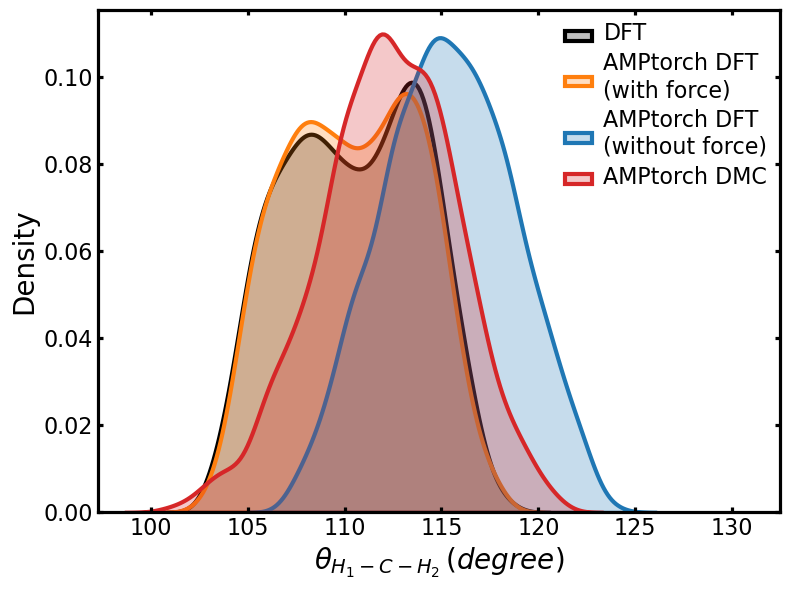

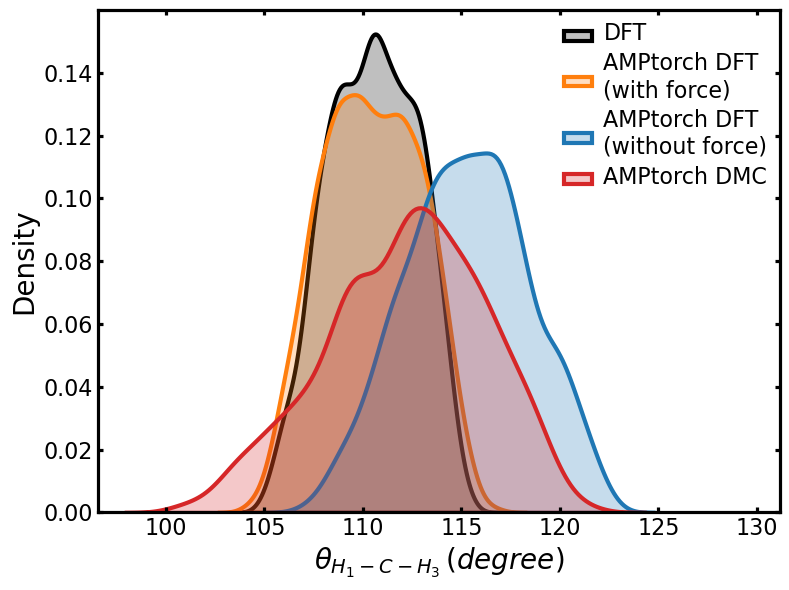

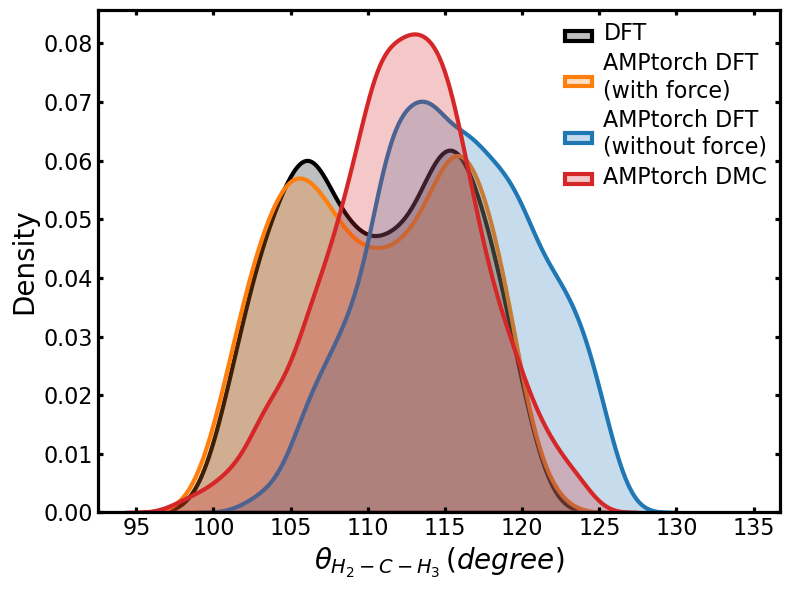

In [19]:
for observable in observables:
    plot_data = {}
    for item in file:
        plot_data[item] = data[item][observable]

    if "d" in observable:
        xlabel = observable + r"$\,({\AA})$"
    if "theta" in observable:
        xlabel = observable + r"$\,(degree)$"
    ylabel = "Density"

    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8,6))

    for item in plot_data:
        sns.kdeplot(plot_data[item], 
                    shade = True, 
                    linewidth = 3, 
                    bw_adjust = 1, 
                    label = item, 
                    color = color[item],
                )

    ax.set_xlabel(xlabel=xlabel)
    ax.set_ylabel(ylabel=ylabel)
    ax.tick_params(axis="y")
    ax.yaxis.set_ticks_position("both")
    ax.xaxis.set_ticks_position("both")
    ax.legend(frameon=False)
    if "Cl-C-H_{1}" in observable:
        left, right = ax.get_xlim()
        ax.set_xlim(left - 10, right)
    if "Cl-C-H" in observable:
        ax.legend(loc=(0.05, 0.6), frameon=False)
    if re.match(r".*H_{.*}-C-H_{.*}.*", observable):
        left, right = ax.get_xlim()
        ax.set_xlim(left, right + 5)

    useLargeSize(plt, ax)
    new_observable = ""
    for i in observable:
        if i not in {"\\","$", "{", "}", "-"}:
            new_observable += i 
    figname = "ch3cl_nve_{}_distribution.png".format(new_observable)
    # print(figname)
    plt.savefig("./nve_analysis/{}".format(figname), dpi=300)